***Análisis Estadístico y Modelado Predictivo del Índice Socioeconómico de Evaluados del ICFES utilizando Técnicas de Regresión Lineal y Redes Neuronales***

Juan Diego Rojas Ávila (2221233) - Estadística 2 (A1)

En el contexto educativo colombiano, el ICFES desempeña un papel crucial al evaluar las competencias de los estudiantes a través de pruebas estandarizadas. Estos resultados no solo reflejan el rendimiento académico, sino que también se utilizan como un medio para analizar las condiciones socioeconómicas de los estudiantes, lo cual tiene un impacto directo en las oportunidades educativas y laborales a las que pueden acceder.

Uno de los principales desafíos en el análisis de datos educativos es la presencia de valores faltantes, especialmente en variables sensibles como el índice socioeconómico individual de los estudiantes, el cual puede estar incompleto por diversas razones. Estos valores faltantes pueden generar sesgos en los análisis si no se abordan adecuadamente.

Este trabajo busca abordar ese problema utilizando técnicas avanzadas de imputación de datos basadas en modelos de regresión lineal múltiple y redes neuronales. A partir de los puntajes de las pruebas en áreas clave como lectura crítica, matemáticas, ciencias naturales, ciencias sociales e inglés, se desarrollan modelos predictivos que permiten imputar los valores faltantes del índice socioeconómico, proporcionando una visión más completa y precisa de la situación de cada estudiante.

Además de imputar los datos faltantes, el análisis se enmarca en un contexto social más amplio, donde las disparidades socioeconómicas influyen en los resultados educativos y, por ende, en el futuro de miles de jóvenes. La correcta imputación de estos datos no solo mejora la calidad de los análisis estadísticos, sino que también permite formular políticas educativas más inclusivas y equitativas, basadas en información más completa y precisa.

In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

A continuación, cargamos nuestra base de datos.

In [5]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


La siguiente línea de código carga el archivo SB11_20231.TXT desde el diccionario uploaded, lo lee como un archivo en formato de texto delimitado por el carácter '¬', y lo convierte en un DataFrame de pandas llamado datos_icfes. Este DataFrame lo usaremos posteriormente para realizar análisis y manipulaciones de datos en el contexto del proyecto educativo.

In [6]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
 delimiter='¬')

<ipython-input-6-d218d32a6dd2>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


A continuación, procederemos a eliminar los valores faltantes (NaN), ésto con el fin de realizar el análisis estadístico sin la interferencia de datos incompletos. Al filtrar los datos de esta manera, se asegura que el análisis posterior refleje con mayor precisión la realidad educativa de los estudiantes, permitiendo identificar tendencias, desigualdades y áreas de mejora. En un entorno donde la calidad de la educación y la equidad son temas centrales de debate, contar con datos completos es esencial para formular políticas efectivas que promuevan la inclusión y el acceso igualitario a oportunidades educativas.

In [7]:
# Eliminar los valores faltantes en las variables clave
icfes_sin_nan = datos_icfes[
    (~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
    (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
    (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
    (~datos_icfes['PUNT_C_NATURALES'].isna()) &
    (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
    (~datos_icfes['PUNT_INGLES'].isna())]

In [8]:
# Ver las primeras filas de los datos limpios
icfes_sin_nan.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR
4,TI,COLOMBIA,F,04/05/2005,20231,SB11202310044933,ESTUDIANTE,COLOMBIA,VALLE,76,...,69.0,57.0,B1,263,39.0,51.223795,3.0,3,92.0,PUBLICAR
5,TI,COLOMBIA,M,03/06/2005,20231,SB11202310029637,ESTUDIANTE,COLOMBIA,LA GUAJIRA,44,...,45.0,19.0,A-,271,43.0,57.690401,3.0,3,93.0,PUBLICAR
6,TI,COLOMBIA,F,23/08/2005,20231,SB11202310026848,ESTUDIANTE,COLOMBIA,VALLE,76,...,50.0,29.0,A1,295,54.0,39.984838,1.0,3,94.0,PUBLICAR


A continuación, creamos un nuevo DataFrame denominado tabla_regresion, que selecciona un subconjunto específico de columnas del DataFrame icfes_sin_nan, el cual, como ya vimos anteriormente, contiene datos limpios y sin valores faltantes sobre el desempeño académico de estudiantes en el exámen del ICFES en Colombia.

In [9]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0


La siguiente línea de código genera histogramas para cada una de las variables especificadas en la lista columnas a partir del DataFrame icfes_sin_nan. Estas variables incluyen puntajes en las diferentes pruebas del exámen y el nivel socioeconómico del estudiante. Utilizando el DataFrame icfes_sin_nan.

La generación de estos histogramas es fundamental en el análisis educativo, ya que permite identificar tendencias y posibles problemas en el desempeño académico de los estudiantes. Al observar la distribución de los puntajes, se pueden detectar áreas donde ciertos grupos de estudiantes podrían tener un rendimiento significativamente más bajo, lo que podría estar relacionado con factores socioeconómicos.

Por ejemplo, si se observa que los puntajes en matemáticas son consistentemente bajos para un grupo socioeconómico específico, esto podría indicar una falta de recursos educativos, acceso limitado a tutorías o apoyo académico, o incluso deficiencias en el currículo escolar. Identificar estas desigualdades es un paso crucial para desarrollar políticas educativas más efectivas que busquen mejorar la equidad en el acceso a una educación de calidad.

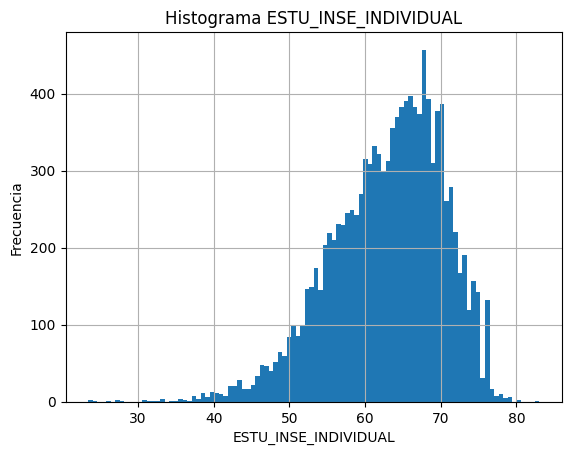

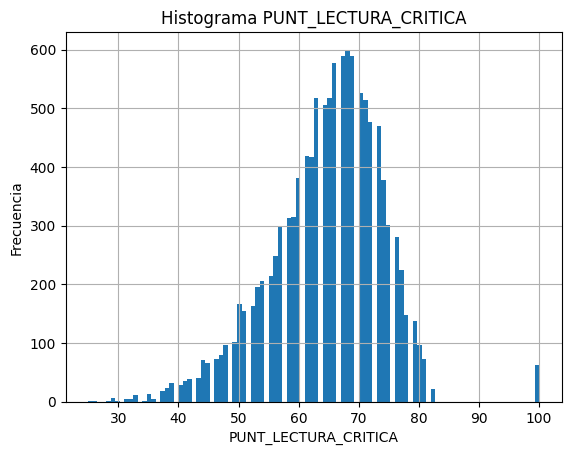

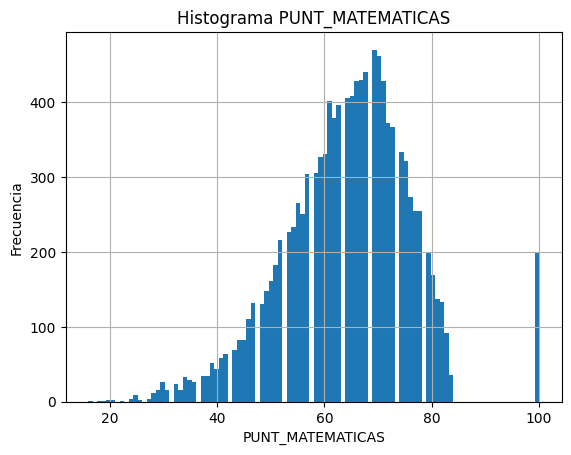

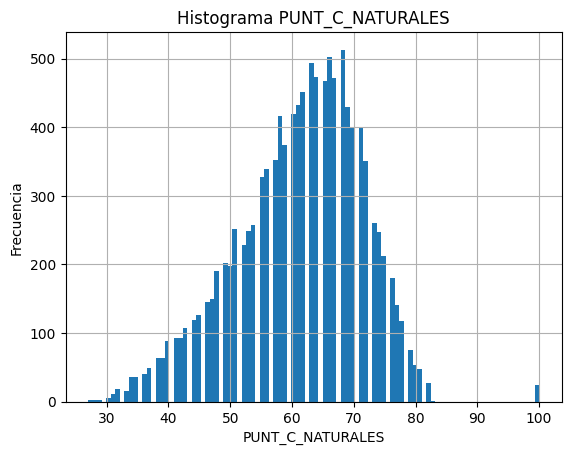

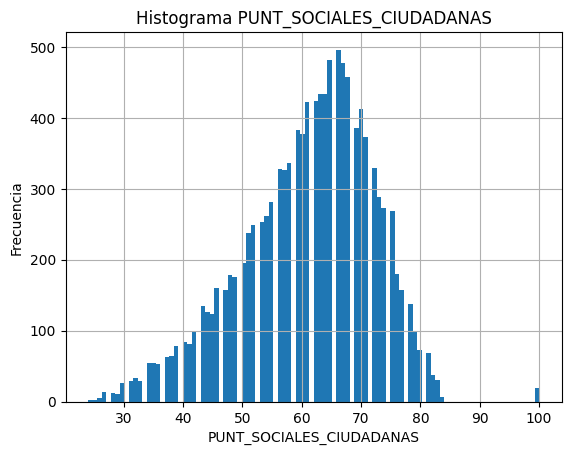

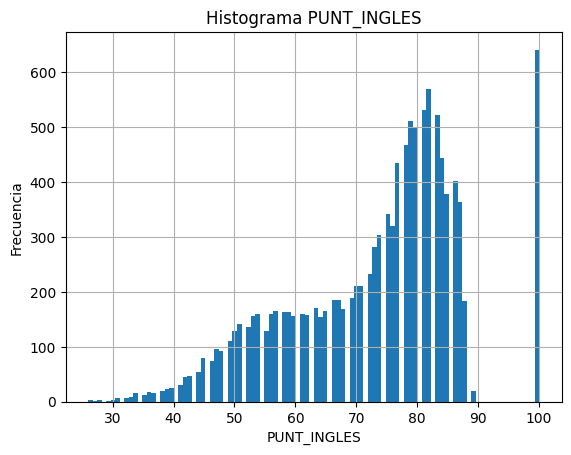

In [10]:
# Nombres de las columnas que quieres graficar
columnas = ["ESTU_INSE_INDIVIDUAL", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES"]

# Generar histogramas para cada variable
for columna in columnas:
    icfes_sin_nan[columna].hist(bins=100)
    plt.title(f"Histograma {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.show()  # Mostrar el histograma antes de pasar al siguiente


De acuerdo con los anteriores histogramas podemos interpretar lo siguiente:

Podemos observar con respecto al índice socioeconómico del evaluado que muy pocos estudiantes presentan un índice menor que 40 y muy pocos por encima de 80. Esta concentración de valores en un rango específico sugiere que la muestra podría no ser representativa de la población estudiantil en general. La distribución de los índices socioeconómicos refleja desigualdades estructurales en el acceso a oportunidades educativas y recursos, con implicaciones significativas para el rendimiento académico. Un número reducido de estudiantes en los extremos del rango podría indicar una falta de movilidad social, lo que subraya la importancia de implementar políticas que promuevan la equidad y el acceso a recursos para todos los estudiantes, independientemente de su contexto socioeconómico.

Con respecto al puntaje de Lectura Crítica, muy pocos estudiantes presentan puntajes menores que 35 aproximadamente, y casi ninguno alcanza puntajes entre 83 y 99, aunque algunos logran un puntaje perfecto de 100. Esta distribución sugiere una falta de diversidad en las habilidades de lectura crítica, lo que podría indicar que los resultados no son representativos de la población estudiantil en general. La escasez de puntajes bajos puede ser un reflejo de limitaciones en el acceso a recursos educativos adecuados y en la calidad de la enseñanza de la lectura crítica. Además, un bajo desempeño en esta área no solo puede obstaculizar el rendimiento académico en otras materias, sino que también puede perpetuar desigualdades en la educación, subrayando la necesidad de intervenciones que fomenten la equidad y el desarrollo de competencias críticas en todos los estudiantes.

Con respecto a Matemáticas, muy pocos estudiantes obtienen puntajes inferiores a 30, y casi ninguno alcanza entre 84 y 99, aunque una cantidad no muy pequeña logra un puntaje perfecto de 100. Esta distribución sugiere una concentración de habilidades matemáticas en los extremos, lo que indica que los resultados pueden no ser representativos del rendimiento general de la población estudiantil. La escasez de puntajes bajos podría reflejar limitaciones en el acceso a recursos educativos y en la calidad de la enseñanza en matemáticas. Además, un bajo desempeño en esta materia puede impactar negativamente el rendimiento en otras áreas académicas, especialmente aquellas que requieren habilidades cuantitativas.

Analizando los puntajes de Ciencias Naturales, se observa que muy pocos estudiantes obtienen puntajes inferiores a 30, y casi ninguno se encuentra en el rango de 83 a 99 puntos, aunque una cantidad pequeña logra un puntaje perfecto de 100. Esta distribución sugiere una concentración de habilidades en los extremos, lo que indica que los resultados pueden no ser representativos del rendimiento general de la población estudiantil. La escasez de puntajes bajos podría reflejar limitaciones en el acceso a recursos educativos y en la calidad de la enseñanza en ciencias naturales. Además, un bajo desempeño en esta materia puede afectar negativamente el rendimiento en disciplinas que requieren habilidades científicas y tecnológicas.

Con Sociales y Ciudadanas ocurre algo muy parecido, muy pocos estudiantes obtienen puntajes inferiores a 30, y casi ninguno se encuentra en el rango de 83 a 99, aunque una cantidad muy pequeña logra un puntaje perfecto de 100. Esta distribución sugiere una concentración de habilidades en los extremos, lo que indica que los resultados pueden no ser representativos del rendimiento general de la población estudiantil. La escasez de puntajes bajos podría reflejar limitaciones en el acceso a recursos educativos y en la calidad de la enseñanza en ciencias sociales. Además, un bajo desempeño en esta materia puede afectar la capacidad de los estudiantes para participar activamente en la sociedad, lo que es fundamental para fomentar una ciudadanía informada y comprometida.

En los puntajes de inglés ocurre algo curioso: muy pocos estudiantes obtienen puntajes inferiores a 40 y casi ninguno se encuentra en el rango de 90 a 99, pero una gran cantidad de estudiantes logra un puntaje perfecto de 100. Esta distribución sugiere una concentración significativa en el extremo superior de la escala, lo que indica que los resultados pueden no ser representativos del rendimiento general de la población estudiantil en esta materia. La escasez de puntajes bajos puede reflejar una metodología de enseñanza que favorece la memorización y los exámenes estandarizados, lo que podría explicar la alta cantidad de puntajes perfectos. Además, un desempeño desigual en inglés puede afectar la capacidad de los estudiantes para comunicarse efectivamente y acceder a oportunidades académicas y laborales, considerando la importancia del idioma en el contexto global.

A continuación, para corroborar lo anterior, procederemos a realizar diagramas de cajas y bigotes para cada variable, y así observar más detalladamente los datos que podemos considerar como No representativos.

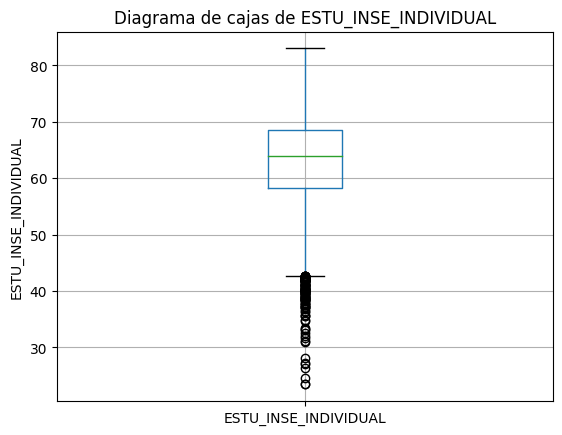

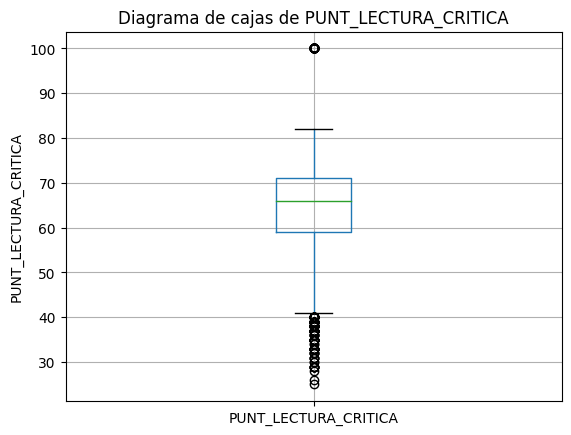

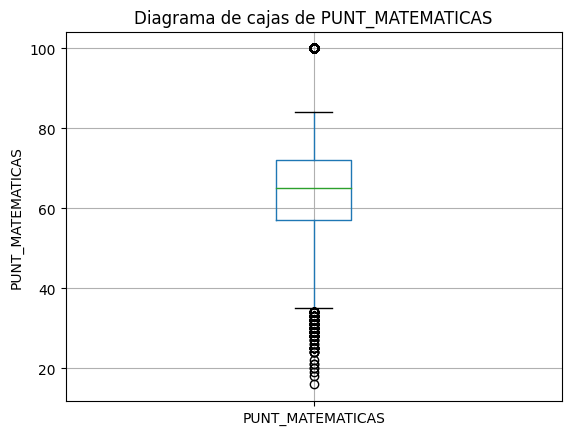

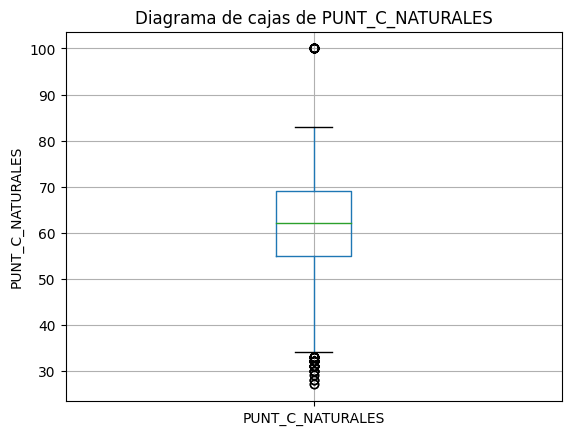

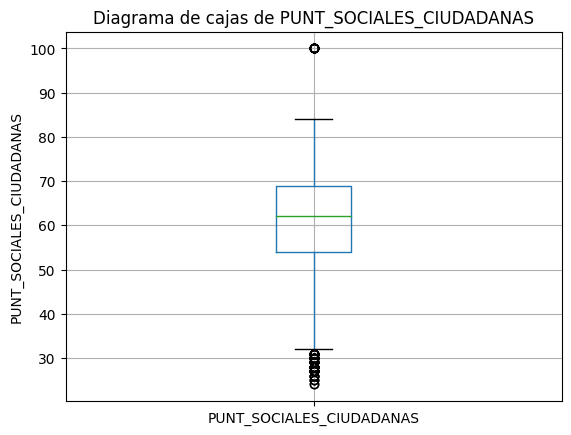

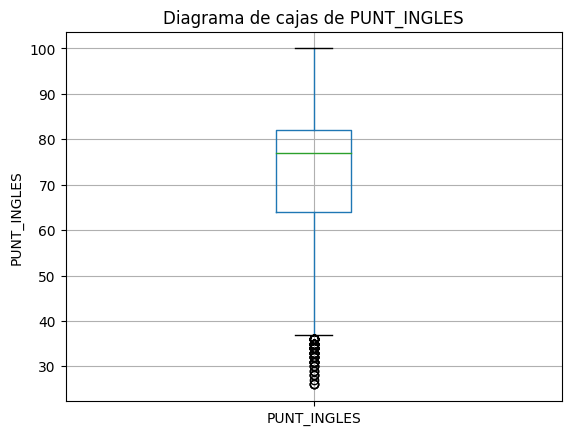

In [11]:
columnas = ["ESTU_INSE_INDIVIDUAL", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES"]

# Generar diagramas de cajas y bigotes para cada variable
for columna in columnas:
    icfes_sin_nan.boxplot(column=columna)
    plt.title(f"Diagrama de cajas de {columna}")
    plt.ylabel(columna)
    plt.show() # Mostrar el diagrama

Al realizar los diagramas de cajas y bigotes, se observa que, efectivamente, en relación con el índice socioeconómico del evaluado, se considera atípico que un evaluado presente un índice menor a 43. Estos valores atípicos pueden no ser representativos de la población estudiada, ya que indican situaciones extremas que se encuentran significativamente alejadas de la tendencia central. La presencia de estos índices podría distorsionar el análisis general, afectando medidas descriptivas como la media y la desviación estándar. Además, estos valores atípicos pueden estar vinculados a factores sociales específicos, como la falta de acceso a recursos educativos o condiciones económicas difíciles. Por lo tanto, es crucial considerar la exclusión de estos valores atípicos en futuros análisis, a menos que se busque entender las desigualdades presentes en el contexto socioeconómico de los evaluados.

En el puntaje de lectura critica se observa que es atípico que un evaluado obtenga un puntaje inferior a 40 o 41. Asimismo, el hecho de obtener un puntaje perfecto de 100 también puede considerarse atípico, dado que representa una excepcionalidad en las habilidades de lectura crítica entre los estudiantes. Tanto los puntajes bajos como los puntajes perfectos pueden no ser representativos del rendimiento general de la población estudiantil, sugiriendo que la mayoría se encuentra en un rango intermedio. Un análisis detallado de las razones detrás de estos puntajes puede ofrecer información valiosa sobre las estrategias de enseñanza y los desafíos que enfrentan los estudiantes en lectura crítica, teniendo en cuenta el contexto educativo y social en el que se desarrollan.

Con respecto a Matematicas se identifica que es atípico que un evaluado obtenga un puntaje inferior a 38. Además, la obtención de un puntaje perfecto de 100 también se considera atípica, dado que refleja un nivel excepcional de habilidad matemática entre los estudiantes. Nuevamente estos datos pueden ser no representativos del rendimiento de los estudiantes en dicha área.

En Ciencas Naturales se puede observar que un puntaje inferior a 35 es considerado atípico, lo que sugiere que estos estudiantes enfrentan serias dificultades en su comprensión de la materia. Por otro lado, obtener un puntaje perfecto de 100 también es inusual, indicando un dominio excepcional del contenido que podría estar asociado con factores como un ambiente educativo privilegiado. Estos puntajes extremos resaltan la necesidad de comprender el rendimiento general de la población estudiantil, así como también resaltar la importancia de crear estrategias que aborden tanto las dificultades de los estudiantes con puntajes bajos como la promoción del aprendizaje en todos los niveles.

Al observar el diagrama con respecto a los puntajes de la prueba de Sociales y Ciudadanas se observa que un puntaje inferior a 31 es considerado atípico, lo que sugiere que estos estudiantes enfrentan desafíos significativos en su comprensión de los temas tratados. Por otro lado, obtener un puntaje perfecto de 100 también es inusual, indicando un nivel excepcional de dominio del contenido que podría asociarse con un entorno educativo favorable. Estos resultados extremos ponen de manifiesto que la mayoría de los estudiantes se sitúa en un rango intermedio, lo que puede llevar a una percepción distorsionada del rendimiento general en esta materia.

En el área de inglés, se observa que obtener un puntaje inferior a 38 es considerado atípico, lo que sugiere que estos estudiantes enfrentan serios desafíos en la adquisición de habilidades lingüísticas básicas. Este resultado indica que un grupo reducido de estudiantes se sitúa por debajo de la norma esperada, lo que podría ser el reflejo de una falta de exposición al idioma o métodos de enseñanza que no se ajustan a sus necesidades. Factores como la motivación, el acceso a recursos educativos y el entorno familiar pueden influir significativamente en el aprendizaje del idioma. Para mejorar el rendimiento en inglés, es esencial desarrollar estrategias que atiendan las necesidades de los estudiantes con dificultades, promoviendo un aprendizaje activo y accesible que fomente la adquisición de competencias lingüísticas.

De acuerdo con el análisis anterior, realizamos un nuevo data.frame en el cual, descartamos los valores no representativos.

In [12]:
tabla_regresion1 = tabla_regresion[
    (43 < tabla_regresion["ESTU_INSE_INDIVIDUAL"]) &
    (tabla_regresion['PUNT_LECTURA_CRITICA'] > 41) & (tabla_regresion['PUNT_LECTURA_CRITICA'] < 99) &
    (tabla_regresion['PUNT_MATEMATICAS'] > 38) & (tabla_regresion['PUNT_MATEMATICAS'] < 99) &
    (tabla_regresion['PUNT_C_NATURALES'] > 35) & (tabla_regresion['PUNT_C_NATURALES'] < 99) &
    (tabla_regresion['PUNT_SOCIALES_CIUDADANAS'] > 32) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS'] < 99) &
    (tabla_regresion['PUNT_INGLES'] > 38) & (tabla_regresion['PUNT_INGLES'] < 99)
]

tabla_regresion1.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
4,51.223795,53,55,41,56,69.0
7,50.613232,57,68,74,61,52.0
8,51.019087,60,70,69,63,73.0
9,52.959293,71,70,64,64,63.0


A continuación, con la siguiente línea de código se generan diagramas de dispersión para visualizar la relación entre los puntajes de cinco variables (lectura crítica, matemáticas, ciencias naturales, sociales y ciudadanas, e inglés) y el índice socioeconómico de los evaluados (ESTU_INSE_INDIVIDUAL), con el fin de ver si existe alguna dependencia entre las variables.

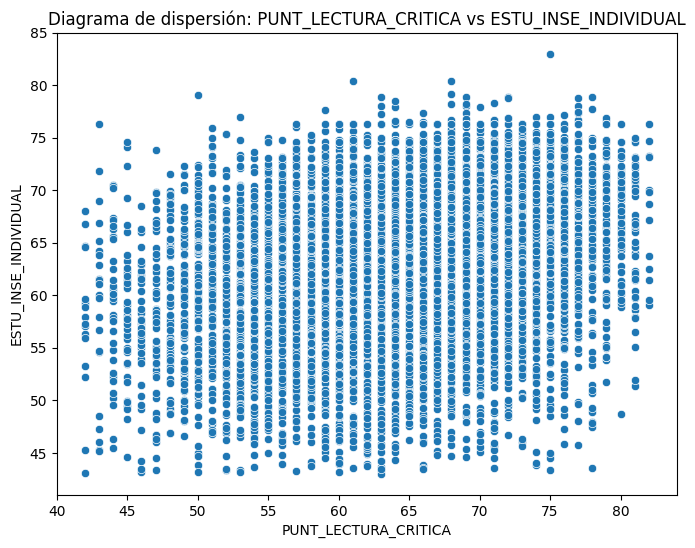

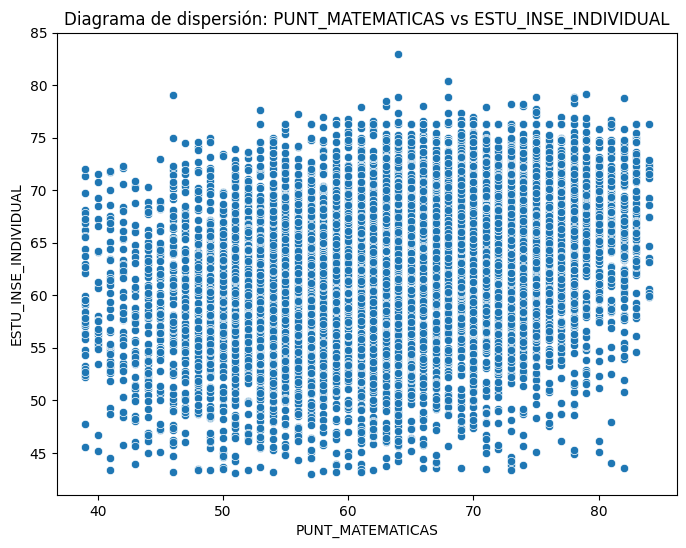

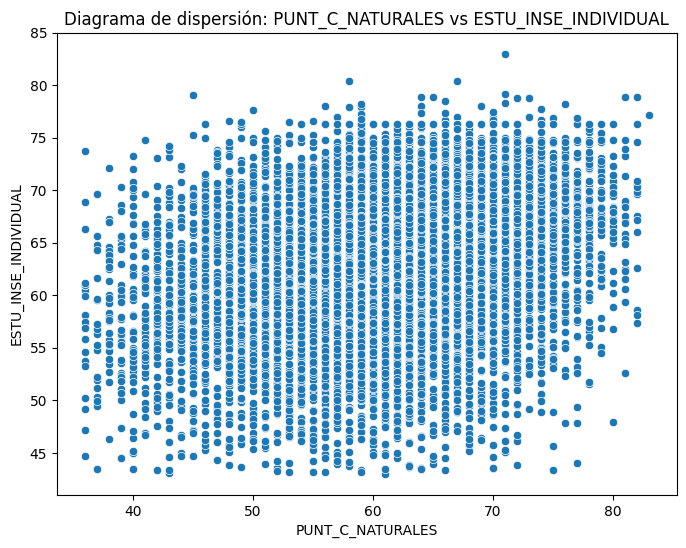

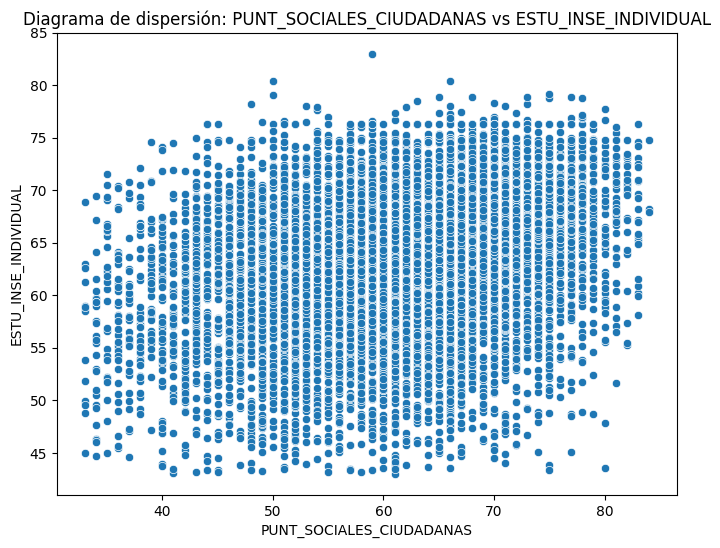

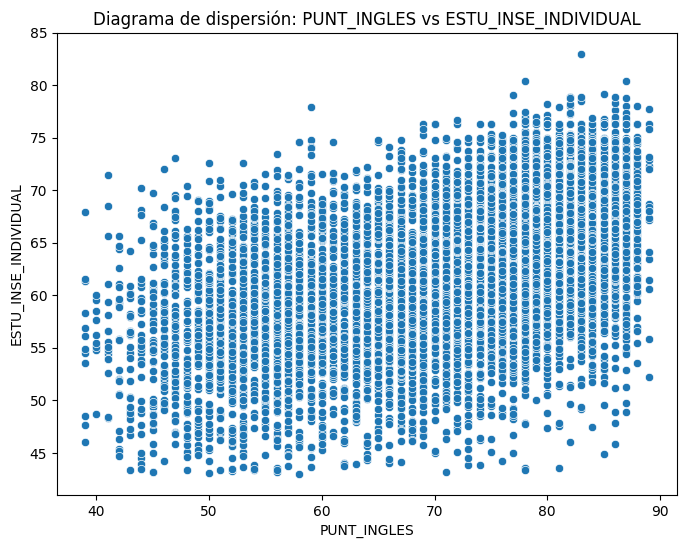

In [13]:
# Lista de variables explicativas
variables = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
             'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']

# Crear diagramas de dispersión
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tabla_regresion1[var], y=tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
    plt.title(f'Diagrama de dispersión: {var} vs ESTU_INSE_INDIVIDUAL')
    plt.xlabel(var)
    plt.ylabel('ESTU_INSE_INDIVIDUAL')
    plt.show()


En cada diagrama de dispersión se observan nubes de puntos sin patrones particulares, ésto indica que las variables de rendimiento académico y el índice socioeconómico podrían ser, en gran medida, independientes, o al menos, presentan una dependencia no muy fuerte. Este hallazgo resalta la complejidad del rendimiento educativo y la necesidad de enfoques personalizados y multifacéticos en las políticas educativas. Al fomentar un entorno que considere las realidades de cada estudiante, se puede contribuir a un sistema educativo más equitativo y efectivo, capaz de empoderar a todos los estudiantes, independientemente de su contexto socioeconómico.

La siguiente línea de código se utilizará para preparar los datos para un modelo de aprendizaje automático, específicamente para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
Esto tiene implicaciones importantes en contextos sociales, especialmente en el ámbito educativo, donde se busca comprender y mejorar el rendimiento de los estudiantes.

In [14]:
X = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
6901,58,63,55,51,49.0
1758,58,51,55,61,71.0
6393,60,67,48,63,83.0
5757,50,53,55,60,84.0


El código implementa un modelo de regresión lineal que busca entender y predecir el índice socioeconómico de los estudiantes a partir de su rendimiento en diversas materias. Este tipo de análisis es fundamental para abordar problemas de inequidad en la educación y puede guiar la creación de políticas que favorezcan el apoyo a aquellos estudiantes que enfrentan mayores desafíos.

In [15]:
modelo_lineal = LinearRegression() # Con todas las variables
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)

In [16]:
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.27223730410384606

El valor obtenido de 0.304 sugiere que aproximadamente el 30.43% de la variación en el índice socioeconómico de los estudiantes puede ser explicada por sus puntajes en las materias analizadas (lectura crítica, matemáticas, ciencias naturales, sociales y ciudadanía, e inglés), es decir hay una relación moderada entre el rendimiento académico y el índice socioeconómico. Si bien existe una conexión, el modelo no explica la mayoría de la variabilidad, lo que sugiere que otros factores también juegan un papel importante en la determinación del índice socioeconómico.

A continuación, se determinarán cuales variables son más explicativas.

In [17]:
X1 = tabla_regresion1[['PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
train1X.head(4)

,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
6901,63,55,51,49.0
1758,51,55,61,71.0
6393,67,48,63,83.0
5757,53,55,60,84.0


In [18]:
# Sin la variable PUNT_LECTURA_CRITICA
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
r2_lineal1

0.27202572728522467

In [19]:
# Sin la variable PUNT_MATEMATICAS
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
train2X.head(4)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
pred_lineal2 = regresion2.predict(test2X)
r2_lineal2 = regresion2.score(test2X, test2Y)
r2_lineal2

0.27104297366556607

In [20]:
# Sin la variable PUNT_C_NATURALES
X3 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)
train3X.head(4)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
pred_lineal3 = regresion3.predict(test3X)
r2_lineal3 = regresion3.score(test3X, test3Y)
r2_lineal3

0.2724545704694429

In [21]:
# Sin la variable PUNT_SOCIALES_CIUDADANAS
X4 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_INGLES']]
Y4 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train4X, test4X, train4Y, test4Y = train_test_split(X4, Y4, test_size = 0.2, random_state = 0)
train4X.head(4)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(train4X, train4Y)
pred_lineal4 = regresion4.predict(test4X)
r2_lineal4 = regresion4.score(test4X, test4Y)
r2_lineal4

0.27277987918131374

In [22]:
# Sin la variable PUNT_INGLES
X5 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
Y5 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train5X, test5X, train5Y, test5Y = train_test_split(X5, Y5, test_size = 0.2, random_state = 0)
train5X.head(4)
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(train5X, train5Y)
pred_lineal5 = regresion5.predict(test5X)
r2_lineal5 = regresion5.score(test5X, test5Y)
r2_lineal5

0.11142124174382684

Comparando los resultados anteriores, podemos decir que las variables PUNT_MATEMATICAS y PUNT_INGLES son explicativas, esto nos sugiere que estas variables tienen un impacto significativo en la predicción del indice socioeconómico.

Este análisis tiene importantes implicaciones para el diseño de políticas educativas y programas de apoyo que busquen abordar las desigualdades en el rendimiento académico y el bienestar socioeconómico de los estudiantes. Al priorizar estas áreas, se pueden crear oportunidades que beneficien a estudiantes de diversas condiciones sociales y económicas.


El siguiente código muestra cómo se preparan los datos para entrenar un modelo predictivo que relaciona el rendimiento en matemáticas e inglés con el índice socioeconómico de los estudiantes. Esta estructura permite un análisis más profundo de cómo las habilidades académicas influyen en el bienestar socioeconómico, lo que puede guiar futuras intervenciones educativas y políticas públicas. Al centrarse en las variables de matemáticas e inglés, se subraya la importancia de estas asignaturas en el desarrollo académico de los estudiantes. Mejorar el rendimiento en estas áreas podría tener un impacto positivo en el índice socioeconómico, lo que puede ser vital para abordar las desigualdades en el sistema educativo.

In [23]:
XY, Z = tabla_regresion1[["PUNT_MATEMATICAS", "PUNT_INGLES"]], tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainXY.head(4)

,PUNT_MATEMATICAS,PUNT_INGLES
6901,63,49.0
1758,51,71.0
6393,67,83.0
5757,53,84.0


In [24]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ) # Entrenamos el modelo

LinearRegression()

In [23]:
modelo1.score(testXY, testZ)

0.30369724523400443

El valor de  0.3037 indica que aproximadamente el 30.37% de la variación en el índice socioeconómico de los estudiantes puede ser explicada por sus puntajes en matemáticas e inglés. Esto sugiere que hay una relación significativa, pero que todavía queda un 69.63% de la variabilidad que no se explica por estas dos variables. Nuevamente se observa que hay una relación moderada entre el rendimiento académico en matemáticas e inglés y el índice socioeconómico. Esto refuerza la idea de que, aunque estas variables son relevantes, no son las únicas que afectan el bienestar socioeconómico de los estudiantes. Puede deberse a otros factores, tales como el contexto familiar, las condiciones socioeconómicas del hogar, el acceso a recursos educativos, el ambiente escolar, o incluso factores emocionales y sociales. Estos elementos pueden influir significativamente en el rendimiento académico y en la situación socioeconómica de los estudiantes, lo que conlleva a la necesidad de explorar factores adicionales que pueden influir en el bienestar de los estudiantes y enfatiza en la importancia de enfoques educativos integrales que atiendan a las diversas necesidades de los estudiantes en contextos socioeconómicos variados.

La siguiente línea de código se utiliza para extraer los coeficientes del modelo de regresión lineal ajustado, lo que permite interpretar la influencia de cada variable independiente en la variable dependiente.

In [25]:
array = modelo1.coef_
array

array([0.02831717, 0.30899713])

Del resultado obtenido, podemos observar:

* 0.0188 (coeficiente para PUNT_MATEMATICAS): Este coeficiente indica que por cada unidad adicional en el puntaje de matemáticas, se espera que el índice socioeconómico del estudiante aumente aproximadamente 0.0188 unidades, manteniendo constante el puntaje de inglés.
* 0.3154 (coeficiente para PUNT_INGLES): Este coeficiente sugiere que por cada unidad adicional en el puntaje de inglés, el índice socioeconómico del estudiante se incrementa en aproximadamente 0.3154 unidades, manteniendo constante el puntaje de matemáticas.

Los coeficientes positivos indican que hay una relación directa entre los puntajes en matemáticas e inglés y el índice socioeconómico. A medida que los estudiantes mejoran en estas áreas, su índice socioeconómico también tiende a aumentar. Además el coeficiente para PUNT_INGLES es significativamente más alto que el de PUNT_MATEMATICAS, lo que sugiere que el puntaje en inglés tiene un impacto más fuerte en el índice socioeconómico. Esto podría reflejar la importancia del dominio del inglés en contextos académicos y profesionales, especialmente en entornos donde el inglés es un idioma clave.

Estos hallazgos pueden tener implicaciones importantes para las políticas educativas. Si el dominio del inglés es crucial para el aumento del índice socioeconómico, se podrían desarrollar programas educativos que enfoquen esfuerzos en mejorar la enseñanza y el aprendizaje del inglés, pero, el hecho de que el coeficiente de matemáticas sea menor que el de inglés podría también reflejar desigualdades en el acceso a recursos y oportunidades educativas. Las intervenciones que aborden estas desigualdades pueden ayudar a mejorar tanto el rendimiento académico como el bienestar socioeconómico de los estudiantes, especialmente en comunidades marginadas.

<Axes: >

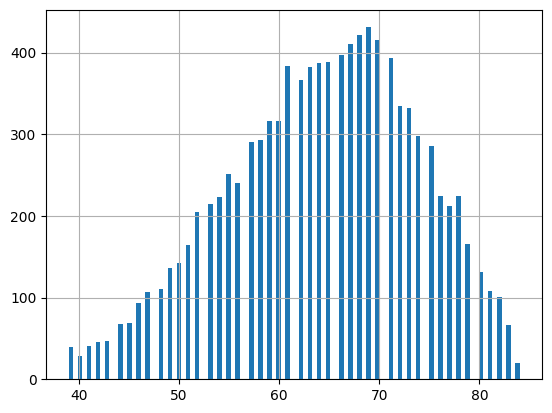

In [26]:
tabla_regresion1["PUNT_MATEMATICAS"].hist(bins = 100)

A continuación, podemos generar una visualización 3D de un modelo de regresión lineal que relaciona los puntajes de matemáticas e inglés con el índice socioeconómico de los estudiantes.

La superficie de regresión representa la relación estimada entre los puntajes en matemáticas e inglés y el índice socioeconómico. Observar cómo los puntos de datos se distribuyen en relación con esta superficie permite identificar patrones de rendimiento académico que pueden correlacionarse con el bienestar socioeconómico.

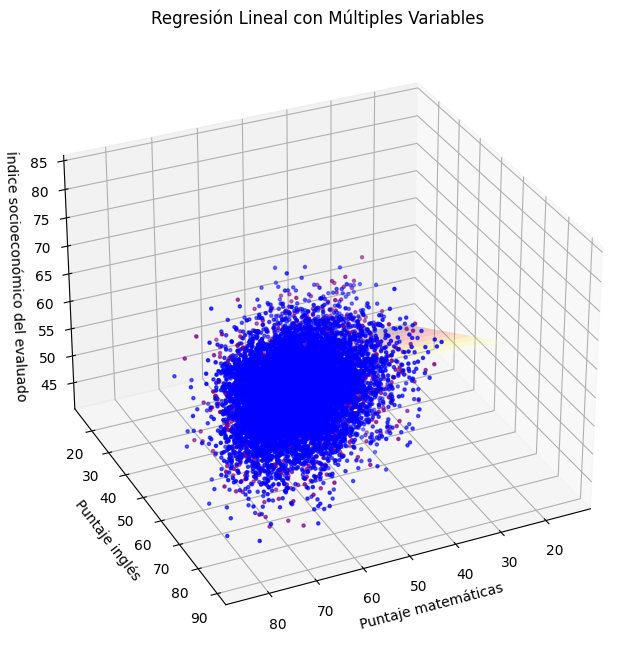

In [29]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(15, 65, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["PUNT_MATEMATICAS"], trainXY["PUNT_INGLES"], trainZ, c='blue',s=5)
ax.scatter(testXY["PUNT_MATEMATICAS"], testXY["PUNT_INGLES"], testZ, c='purple',s=5)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Puntaje matemáticas')
ax.set_ylabel('Puntaje inglés')
ax.set_zlabel('Índice socioeconómico del evaluado')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

Al visualizar los datos en 3D, es posible identificar agrupaciones de estudiantes en diferentes rangos de puntajes. Se observa que los estudiantes de bajo índice socioeconómico tienen puntajes significativamente más bajos en matemáticas e inglés, esto puede señalar la existencia de desigualdades en el acceso a recursos educativos. Además, se observa que los estudiantes con un índice socioeconómico alto están agrupados en la parte superior del gráfico, lo cual sugiere que el rendimiento académico en estas pruebas está vinculado a condiciones socioeconómicas más favorables.

Este análisis visual puede informar políticas para abordar estas brechas, como aumentar el apoyo académico en áreas donde los estudiantes tienen más dificultades. Al identificar la importancia de los puntajes en matemáticas e inglés en el bienestar socioeconómico, se pueden diseñar programas de intervención que se centren en mejorar estas habilidades en poblaciones vulnerables, contribuyendo así a una mayor equidad educativa.

A continuación, se procede a crear y entrenar un modelo de regresión utilizando una red neuronal de múltiples capas. Dichas redes neuronales son particularmente útiles cuando se trabaja con datos complejos y no lineales, como los puntajes de diferentes materias y su relación con el índice socioeconómico. Esto sugiere que la relación entre el rendimiento académico y el bienestar socioeconómico puede no ser simple, y un modelo más sofisticado es necesario para capturar esta complejidad, así como también identificar patrones más sutiles, lo que puede ayudar a diseñar intervenciones educativas más efectivas.

In [30]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
 max_iter = 500,
 activation = 'relu',
 solver = 'adam',
 learning_rate = 'invscaling')
red.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [31]:
red.score(testX, testY)

0.2693300997644358

El valor obtenido, 0.2867, significa que aproximadamente el 28.67% de la variabilidad en el índice socioeconómico del evaluado puede ser explicado por el modelo basado en los puntajes de matemáticas e inglés. Como ya se mencionó anteriormente, el modelo tiene un poder explicativo limitado. Esto sugiere que, aunque hay una relación entre los puntajes de matemáticas e inglés y el índice socioeconómico, gran parte de la variabilidad en el índice no se puede explicar por estas variables. Este resultado podría ser un llamado a la acción para los responsables de políticas educativas. Dado que el modelo no captura bien la complejidad de la relación entre el rendimiento académico y el índice socioeconómico, podría ser necesario investigar más a fondo qué otras variables podrían influir. Esto podría llevar a la inclusión de más datos o a la consideración de factores contextuales en futuras investigaciones.


In [32]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
4,53,55,41,56,69.0
7,57,68,74,61,52.0
8,60,70,69,63,73.0
9,71,70,64,64,63.0


El siguiente código realiza predicciones sobre el índice socioeconómico de un evaluado utilizando dos modelos diferentes: un perceptrón multicapa (una red neuronal) y un modelo de regresión lineal múltiple.

Estas predicciones pueden ser útiles para las instituciones educativas y las políticas sociales, ya que pueden informar sobre el potencial socioeconómico de los estudiantes. Esto podría influir en la asignación de recursos, apoyo adicional o programas específicos para estudiantes en función de sus necesidades. La variación entre los resultados de ambos modelos puede reflejar la complejidad de las relaciones sociales y educativas. Por ejemplo, el modelo de red neuronal puede capturar interacciones más complejas entre las características que el modelo de regresión lineal.

Además, al utilizar modelos para hacer predicciones sobre el índice socioeconómico, sería adecuado considerar las implicaciones éticas y sociales. Las predicciones deben utilizarse de manera que beneficien a los estudiantes y no perpetúen estereotipos o desigualdades.

In [33]:
# Asegúrate de que el array tenga 5 características, no 6
no_obs = np.array([[53, 55, 74, 61, 69]])  # Solo 5 características
print('Se espera que el evaluado tenga un indice socioeconómico de', red.predict(no_obs),
      'bajo el perceptrón multicapa y', modelo_lineal.predict(no_obs),
      'bajo el modelo de regresión lineal múltiple.')


Se espera que el evaluado tenga un indice socioeconómico de [64.5884822] bajo el perceptrón multicapa y [61.73680032] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Basándose en los puntajes proporcionados en las 5 características, se espera que el evaluado tenga un índice socioeconómico entre 64 y 61.

La diferencia entre las dos predicciones (aproximadamente 3.20) indica que, aunque ambos modelos proporcionan resultados similares, hay variaciones en cómo cada modelo interpreta los datos y su complejidad. Esto puede ser resultado de cómo cada modelo ha sido entrenado y las relaciones que ha aprendido en los datos.

Con el siguiente código, se procede a calcular y almacenar los coeficientes de correlación entre un conjunto de variables explicativas (puntajes en cada una de las pruebas) y el índice socioeconómico del evaluado. Esto con el fin de comprender mejor las relaciones entre diferentes variables, además de que también puede servir como base para acciones prácticas y políticas que busquen mejorar la equidad y el acceso a oportunidades educativas para todos los estudiantes.

In [34]:
variables = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']

# Crear un diccionario para almacenar los resultados
correlaciones = {
    'Variable': [],
    'Pearson': [],
    'Spearman': [],
    'Kendall': []
}

# Bucle para calcular los coeficientes de correlación para cada variable explicativa
for variable in variables:
    pearson_corr = np.corrcoef(tabla_regresion1[variable], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
    spearman_corr, _ = spearmanr(tabla_regresion1[variable], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
    kendall_corr, _ = kendalltau(tabla_regresion1[variable], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])

    # Agregar los resultados al diccionario
    correlaciones['Variable'].append(variable)
    correlaciones['Pearson'].append(pearson_corr)
    correlaciones['Spearman'].append(spearman_corr)
    correlaciones['Kendall'].append(kendall_corr)

# Mostrar los resultados
for i in range(len(variables)):
    print(f"Variable: {correlaciones['Variable'][i]}")
    print(f"Pearson: {correlaciones['Pearson'][i]}")
    print(f"Spearman: {correlaciones['Spearman'][i]}")
    print(f"Kendall: {correlaciones['Kendall'][i]}")
    print('-----------------------')


Variable: PUNT_LECTURA_CRITICA
Pearson: 0.3073165781633053
Spearman: 0.3067188204779808
Kendall: 0.21022285222589085
-----------------------
Variable: PUNT_MATEMATICAS
Pearson: 0.338347383096373
Spearman: 0.34562945945765505
Kendall: 0.23699604368178048
-----------------------
Variable: PUNT_C_NATURALES
Pearson: 0.30855691066556357
Spearman: 0.3115214787480823
Kendall: 0.21299380001977994
-----------------------
Variable: PUNT_SOCIALES_CIUDADANAS
Pearson: 0.30552942168538527
Spearman: 0.30983604218775684
Kendall: 0.21180251758647883
-----------------------
Variable: PUNT_INGLES
Pearson: 0.5396512803734342
Spearman: 0.541610561352038
Kendall: 0.37714632059115677
-----------------------


Estos valores obtenidos indican una correlación positiva entre los puntajes en cada área y el índice socioeconómico. PUNT_INGLES muestra la correlación más alta (0.5372), lo que sugiere que los estudiantes con mejores puntajes en inglés tienden a tener un índice socioeconómico más alto. Las demás variables tienen correlaciones moderadas (entre 0.30 y 0.34), sugiriendo que los puntajes en lectura crítica, matemáticas, ciencias naturales y ciencias sociales también están asociados positivamente con el índice socioeconómico, pero no de manera tan fuerte como el puntaje en inglés.

El puntaje en inglés al tener correlación notablemente más alta con el índice socioeconómico, indica que los estudiantes de contextos socioeconómicos más altos tienen mejores oportunidades para aprender y practicar el idioma. Esto puede reflejar acceso a clases particulares, materiales de aprendizaje y entornos que fomentan el aprendizaje de lenguas extranjeras.

La variación en las correlaciones también puede evidenciar desigualdades educativas. Si los estudiantes de entornos socioeconómicos más bajos tienen un desempeño inferior, esto puede llevar a un ciclo de pobreza y falta de oportunidades. Las políticas que busquen equidad educativa deben considerar estas correlaciones para identificar en qué áreas se necesita intervención, especialmente para cerrar la brecha en el aprendizaje y el rendimiento.


Se procede a realizar la imputación de datos, para ello, realizamos un filtrado de datos con el fin de identificar estudiantes cuyos índices socioeconómicos no fueron reportados pero que sí tienen disponibles los puntajes de las pruebas. Este tipo de análisis podría ser relevante para estudiar cómo la falta de información socioeconómica afecta la interpretación de resultados educativos, y también podría ayudar a tomar decisiones sobre cómo mejorar la recolección de datos en futuros estudios para generar informes más completos y representativos.

In [35]:
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]

icfes_connan.head(4)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
35,TI,COLOMBIA,F,25/10/2005,20231,SB11202310012523,ESTUDIANTE,COLOMBIA,VALLE,76,...,52.0,33.0,A1,293,53.0,NaN,NaN,2,NaN,PUBLICAR
63,TI,COLOMBIA,M,03/05/2006,20231,SB11202310004061,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,42.0,A1,318,66.0,NaN,NaN,3,NaN,PUBLICAR
84,TI,COLOMBIA,F,24/09/2003,20231,SB11202310038767,ESTUDIANTE,COLOMBIA,VALLE,76,...,46.0,23.0,A-,218,20.0,NaN,NaN,3,NaN,PUBLICAR
183,TI,COLOMBIA,M,22/12/2005,20231,SB11202310005059,ESTUDIANTE,COLOMBIA,VALLE,76,...,55.0,39.0,A1,280,46.0,NaN,NaN,3,NaN,PUBLICAR


In [36]:
tabla_regresion2 = icfes_connan[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]

El siguiente código predice el índice socioeconómico del evaluado usando el modelo de perceptrón multicapa entrenado anteriormente (red).

In [37]:
X_no = tabla_regresion2.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
red.predict(X_no)

array([58.24877628, 56.9506308 , 52.23551708, 58.43784172, 59.73190108,
       59.11857271, 62.68000036, 57.41672087, 65.42578815, 68.26948133,
       75.68800748, 65.64643598, 65.30024505, 57.48553008, 64.8142084 ,
       58.55483518, 57.86912646, 60.62542501, 59.2019956 , 67.54391443,
       67.19967981, 59.84093694, 56.15576975, 55.85389755, 57.90622955,
       57.65529758, 59.33190276, 61.78062727, 58.46527797, 61.61596615,
       64.88205369, 64.48015829, 60.83130629, 65.48201837, 58.18409663,
       65.09091514, 61.1604001 , 56.00968438, 60.04183597, 59.77795983,
       65.28709786, 55.65774882, 63.44103113, 67.64053143, 67.35700387,
       61.88328518, 56.76162364, 55.73332988, 54.45441185, 55.93213885,
       61.11097534, 64.96196455, 65.26537094, 53.72343553, 54.38113627,
       61.10469214, 67.60511486, 58.21141926, 61.10647408, 63.2878237 ,
       58.67442053, 68.33562685, 75.79881491, 66.6076567 , 68.94547079,
       61.10098516, 61.24223732, 55.25477242, 63.32431521, 56.19

En este código, se está generando una nueva columna en tabla_regresion2 llamada ESTU_INSE_INDIVIDUAL, donde se asignan las predicciones hechas por el modelo de perceptrón multicapa (red).

Este proceso permite imputar o completar los datos faltantes de índice socioeconómico utilizando las predicciones del modelo entrenado. Esto podría ser útil para estudios o análisis donde esta información es importante para evaluar la relación entre los puntajes obtenidos por los estudiantes y sus contextos socioeconómicos, facilitando la evaluación de inequidades o el diseño de intervenciones educativas más inclusivas.

In [38]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = red.predict(X_no)
tabla_regresion2.head(4)

<ipython-input-38-6bc335b1ec39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = red.predict(X_no)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
35,58.248776,67,52,56,62,52.0
63,56.950631,63,62,70,62,57.0
84,52.235517,44,36,46,48,46.0
183,58.437842,54,65,46,59,55.0


***Conclusiones***

Al analizar los diagramas de dispersión y las correlaciones, se observa que los puntajes de las pruebas (lectura crítica, matemáticas, ciencias naturales, sociales y ciudadanía, e inglés) presentan una relación débil o moderada con el índice socioeconómico del evaluado. Los coeficientes de correlación más altos se encuentran en la prueba de inglés, aunque ninguna de las variables muestra una dependencia fuerte.

Tanto el modelo de regresión lineal múltiple como el modelo de perceptrón multicapa presentan coeficientes de determinación bajos (alrededor de 0.3), lo que sugiere que estas variables explican solo una parte limitada de la variabilidad del índice socioeconómico. Esto indica que es probable que haya otros factores que no se han considerado en el análisis y que podrían tener un mayor impacto en el índice.

Además, el uso del modelo de perceptrón multicapa permitió predecir el índice socioeconómico en estudiantes donde faltaba esta información. Esta estrategia es útil para completar datos en análisis educativos donde la información socioeconómica es crucial para estudiar desigualdades o diseñar políticas educativas.


***REFERENCIAS***

* Cárdenas, M., & Cadena, A. (2014). Desigualdad educativa en Colombia: una mirada desde los resultados de las pruebas Saber. Revista de Economía Institucional, 16(31), 77-96.

* Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.